# Lab: Trees

Lab associated with Module: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\benny\AppData\Local\Temp\ipykernel_81324\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

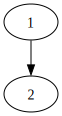

In [5]:
dot

## Digraphs
### Directed Graphs
- This is an example of a DAG (Directed Acyclic Graph)
- A DAG is a directed graph with no cycles
- A cycle is a path of edges and vertices wherein a vertex is reachable from itself
- A directed graph is a graph in which edges have orientations
- **A directed graph is acyclic if and only if its vertices can be ordered in such a way that all the edges are directed from left to right**
- **A directed graph is acyclic if and only if it has a topological ordering**
- A directed graph is connected if it contains a directed path from u to v or a directed path from v to u for every pair of vertices u, v
- A directed graph is disconnected if it is not connected
- A directed graph is semiconnected if there is a path from u to v or a path from v to u for every pair of vertices u, v
- A directed graph is strongly connected if there is a path between all pairs of vertices
- A directed graph is weakly connected if replacing all of its directed edges with undirected edges produces a connected (undirected) graph

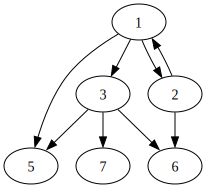

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

This is a recursive algorithm.

In [7]:
class Node:
    
    def __init__(self, value, balance):

        self.val = value
        self.right = None
        self.left = None
        self.balance = balance


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [8]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [9]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting
- np.unique() function can be used to check if all the keys are unique

In [10]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [11]:
test3_tree = buildBinaryTree(test3)

In [17]:

test4_tree = buildBinaryTree([3, 1, 2, 5, 4, 6, 8, 7, 9])

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

- This code does not build a balanced tree, it builds a tree that is dependent on the order of insertion

In [12]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

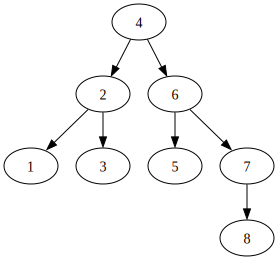

In [13]:
dot = visualize_tree(test1_tree)

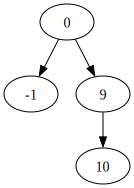

In [14]:
dot = visualize_tree(test2_tree)

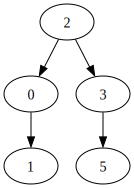

In [15]:
dot = visualize_tree(test3_tree)

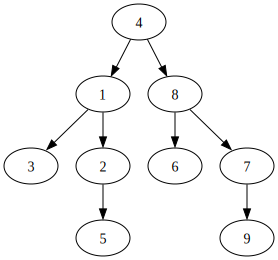

In [18]:
dot = visualize_tree(test4_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

- This code finds the key(value) in the tree and returns True if it is found, else returns False

Search operation should look like:

In [19]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [20]:
search(test3_tree, 3)

True

In [21]:
search(test1_tree, 18)

False

Let us write insert function now:

**upadted code** 
- I removed redundant return statements
- Changed the **==** comaprison to **is** comparison

- The code recusrively traverses the tree and inserts the node at the appropriate location
- It finds the location by comparing the key of the node to be inserted with the key of the current node
- If the key is less than the current node, it goes to the left subtree, else it goes to the right subtree

In [22]:
def insert(nodes, val):

    # Empty Tree
    if nodes is None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left is None: 
            nodes.left = Node(val)
        else:
            insert(nodes.left, val)
    elif nodes.right is None:
        nodes.right = Node(val)
    else:
        insert(nodes.right, val)
    return

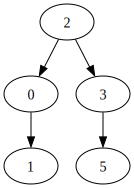

In [23]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

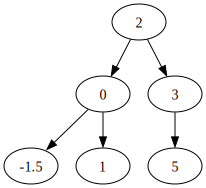

In [24]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

- This function finds the inorder successor of the node
- This is the node with the minimum key value in the right subtree of the node to be deleted

In [25]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes is None:  
        return nodes

    if val < nodes.val:

        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:

        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:

        # Node with only one child or no child

        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp

        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)

        nodes.val = temp.val

        nodes.right = delete(nodes.right, temp.val)

    return nodes

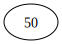

In [44]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

- Test case
- Added value of 45 to the tree

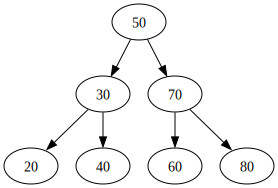

In [45]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

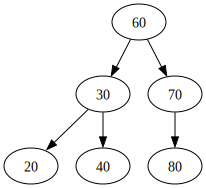

In [46]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

In [ ]:
### TODO ###
### Good Luck ###
class Node:
    
    def __init__(self, value, balance):

        self.val = value
        self.right = None
        self.left = None
        self.balance = balance


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root




***